In [7]:
import os
import pandas as pd
os.chdir('/content/drive/MyDrive/python機器學習專案')

# 設定資料夾路徑
folder_path = 'raw_data'

# 創建一個空的DataFrame來存儲所有資料
all_data = pd.DataFrame()

# 遍歷資料夾中的所有CSV檔案
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        try:
            # 將CSV檔案讀取為DataFrame
            data = pd.read_csv(file_path, usecols=['p_type','content', 'sentiment'])
            # 將讀取的DataFrame添加到所有資料中
            all_data = pd.concat([all_data, data])
        except pd.errors.ParserError as e:
            # 如果解析CSV檔案時出現錯誤，顯示錯誤消息和檔案路徑
            print(f'Error parsing {file_path}: {e}')



In [8]:
all_data.shape

(482643, 3)

In [9]:
valid_sentiments = ['N', 'M', 'P']
all_data = all_data[all_data['sentiment'].isin(valid_sentiments)]

In [10]:
all_data.drop_duplicates(inplace=True)

In [11]:
all_data = all_data.dropna(axis=0, how='any', subset=['content'])

In [12]:
all_data.shape

(275998, 3)

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275998 entries, 0 to 63834
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   p_type     275998 non-null  object
 1   content    275998 non-null  object
 2   sentiment  275998 non-null  object
dtypes: object(3)
memory usage: 8.4+ MB


In [14]:
sentiment_value = all_data['sentiment'].value_counts()
sentiment_value = sentiment_value.to_frame()
sentiment_value

,sentiment
M,174216
P,52013
N,49769


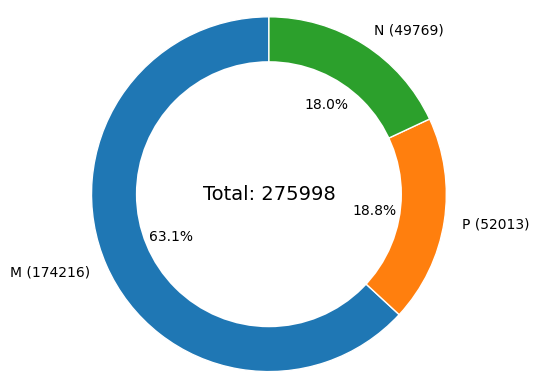

In [15]:
import matplotlib.pyplot as plt

labels = [f'{label} ({value})' for label, value in zip(sentiment_value.index, sentiment_value['sentiment'])]
values = sentiment_value['sentiment']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, radius=1.2,
                                 wedgeprops=dict(width=0.8, edgecolor='w'), textprops=dict(color='black'))

circle = plt.Circle((0, 0), 0.9, fc='white')
fig.gca().add_artist(circle)

# Add total values as text labels
total = sum(values)
ax.text(0, 0, f"Total: {total}", ha='center', va='center', fontsize=14)

    
plt.show()


In [16]:
all_data['content_length'] = all_data['content'].apply(len)
longest_content = all_data["content_length"].max()
shortest_content = all_data["content_length"].min()
medium_leghth = all_data["content_length"].median()
print(f"最長的貼文: {longest_content}")
print(f"最短的貼文: {shortest_content}")
print(f"中位數: {medium_leghth}")

最長的貼文: 23172
最短的貼文: 1
中位數: 221.0


In [17]:
dcard_data = all_data[all_data['p_type'] == 'forum']
ptt_data = all_data[all_data['p_type'] == 'bbs']

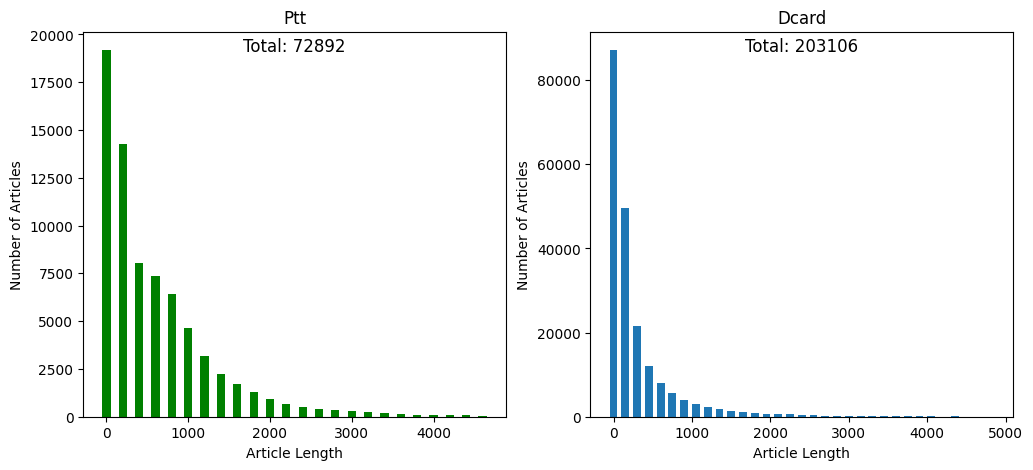

In [18]:
import numpy as np
# 資料集1

bins = range(0, 5000, 200)
hist, edges = np.histogram(ptt_data['content_length'], bins=bins)

# 資料集2
bins = range(0, 5000, 150)
hist2, edges2 = np.histogram(dcard_data['content_length'], bins=bins)

# 畫圖
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 資料集1的圖
axs[0].bar(edges[:-1], hist, width=100, color = 'green')
axs[0].set_xlabel('Article Length')
axs[0].set_ylabel('Number of Articles')
axs[0].set_title('Ptt')
axs[0].annotate(f"Total: {ptt_data.shape[0]}", xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=12)

# 資料集2的圖
axs[1].bar(edges2[:-1], hist2, width=100)
axs[1].set_xlabel('Article Length')
axs[1].set_ylabel('Number of Articles')
axs[1].set_title('Dcard')
axs[1].annotate(f"Total: {dcard_data.shape[0]}", xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=12)

plt.show()

In [19]:
output_data = all_data[(all_data['sentiment'] == 'P') | (all_data['sentiment'] == 'N')]
output_data

,p_type,content,sentiment,content_length
0,forum,偶然得到了一台iPhone 4 但在註冊Apple id時... https://i.img...,N,83
6,forum,剛剛做完電池校正結果整個大當機想說關機重開結果就打不開了 https://www.dcard...,N,123
8,forum,#請益 如題！ 昨天發了限時之後，發現突然沒辦法看到觀看過的人了 請問有人知道這是怎麼了嗎？🙏,N,47
10,forum,請問為何我的IG無法登入一直顯示幾分鐘後嘗試～但已經隔好幾小時了，網頁版也進不去也請官方傳了...,N,92
13,forum,1.預算範圍/考慮機種： 中華電信599方案15000內 samsung a52s 5g 8...,N,350
...,...,...,...,...
63823,bbs,湯姆克魯斯之怒：震撼全球的片場咆哮與好萊塢「防疫絕境」心裡話\n\n\n「懂不懂我身上要背多...,N,1792
63824,bbs,看完這段訪談，才知道編劇黃黎明是黃遠的二姑姑，她在創作《魔法阿嬤》劇本時，\n就是以自己的母...,P,209
63827,bbs,破英翻\n\n我們就是試金石\n\n現在他們讓好萊塢拍電影就是因為我們(在做)\n\n因為他...,N,405
63829,bbs,戰爭片完美融合恐怖元素\n豐富的內容、緊湊的劇情\n真的是難得的好片\n比起單純的戰爭片 或...,P,184


In [20]:
sentiment_value = output_data['sentiment'].value_counts()
sentiment_value = sentiment_value.to_frame()
sentiment_value

,sentiment
P,52013
N,49769


In [21]:
# 把P換成1，N換成0
output_data["sentiment_bool"] = output_data["sentiment"].replace({"P": 1, "N": 0})

<ipython-input-21-44bd75db4916>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_data["sentiment_bool"] = output_data["sentiment"].replace({"P": 1, "N": 0})


In [25]:
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101782 entries, 0 to 63830
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   p_type          101782 non-null  object
 1   content         101782 non-null  object
 2   sentiment       101782 non-null  object
 3   content_length  101782 non-null  int64 
 4   sentiment_bool  101782 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.7+ MB


In [23]:
output_data.to_csv('all_data.csv', index=False)